# 1.Modules
A module is a component providing Python definitions of functions, variables or classes, all corresponding to a given specific theme. All these definitions are contained in a single Python file. Thanks to modules, you can reuse ready-to-use definitions in your own programs.
There are three ways to use a module with the import statement. For example, let’s say we want to use the built-in function `getcwd()` from the module os, that returns the current working directory. We can use it like
this:
```python
# 1st way to import (with prefix)
import os
os.getcwd()
# 2nd way to import (without prefix)
from os import getcwd
getcwd()
# 3rd way to import (without prefix, all elements and functions from os)
From os import *
```

The third way allows you to use any function of os without prefix. This should be avoided as it can lead to conflicts: if you import two modules sharing some function names, or if one of your variable or function is
overwritten by the module.
## 1.1 Useful packages
- **`math`** provides access to mathematical functions like `math.exp(x)`, `math.pow(x,y)`, `math.sqrt(x)`, `math.floor(x)`, `math.sin(x)`...
- **`numpy`** package for scientific computing with Python. It contains among other things tools to manipulate large multi-dimensional arrays, useful linear algebra, Fourier transform, and random number capabilities. A very common abbreviation is np, this way it is faster to call a function from the module :
```python
import numpy as np
np.sin(0) #instead of calling numpy.sin(0) without the abbreviation
```
- **`pandas`** package dedicated to dealing **dataframes**, that can be read from tabular-organised datasets (eg: `gene_eden.gff`). Integrates very well with numpy. A very common abbreviation is `pd`.
- **`random`** : this library provides multiple functions and objects related to the generation of random data, do random sampling for statistical testing, etc. It’s usually available when you import numpy, accessible via `numpy.random`.
- **`matplotlib`** a very powerful meta-library (=containing sub-libraries), that allows creating plots. A bit complex to manipulate, but it is the reference to create plots with Python, and integrates well with numpy, and pandas.
- **`seaborn`** another powerful library dedicated to plotting. It is a simpler interface to matplotlib, which means that creating plots is easier and faster, but still relies on matplotlib.
- **`os`** provides a way of using operating system dependent functionality. For example `os.listdir(path)` and `os.mkdir(path)` are the equivalents to `ls` and `mkdir` in shell, while `os.system(command)` executes directly a shell command.
- **`argparse`** reference module for handling arguments for scripts. The idea is to be able to pass to your script different arguments from the command line. See below for an example of use. Usually imported as `ap`.
- **`RPy`** : Python interface to the R Programming Language.
- **`Biopython`** : a set of freely available Python tools for bioinformatics and molecular biology. Its features include :
    - Parsing bioinformatics files into python structures
    - A sequence class to store sequences, ids and features
    - Interface to popular bioinformatics programs (clustalw, blast, primer3 and more)
    - Tools for performing common operations on DNA/protein sequence (translation, transcription, Tm, weight)
    - Code to deal with alignments
    
Example of Biopython’s sequence class use:
```python
from Bio.Seq import Seq
from Bio.Alphabet import DNAAlphabet
seq_1 = Seq('GATCGATGGGCCTATATAGGA', DNAAlphabet())
rna_1 = seq_1.transcribe()
str(rna_1) # Should return 'GAUCGAUGGGCCUAUAUAGGA'
rna_1.translate() # Seq('DRWAYIG', ExtendedIUAPCProtein())
```

## Exercises on modules
Here you will use:
- the function randn(n) from the module numpy.random, that generates n gaussian random numbers
- the function arange(a,b,c) from the module numpy. This function create a sequence of numbers from a to b with a step c, as an array.
- the functions hist(x) and plot(x,y) from the module matplotlib.pyplot.
These function plot respectively the histogram of the vector x, and y vs x.
Generate a vector of 10000 gaussian random numbers and plot it as a histogram.
Then generate a vector named `myvec` containing 200 points between 0 and $2\pi$.
Using this vector, plot the values of sinus between 0 and $2\pi$.

tips : the `sin()` function is presents both in math and numpy modules, make sure you use the right one for your object.
Import the function `savefig()` from the module matplotlib.pyplot and save the plot with savefig("sin.png"). Check that the image is correctly created in your working directory.

tips : if you want to simply see the graph without saving, use the function
`show()` from the module `matplotlib.pyplot`, but note that you have to re-
generate the graph to save it with `savefig()` after this.

## Answer

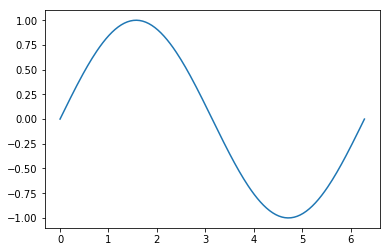

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,200)
y = np.sin(x)
plt.plot(x,y)
plt.savefig("sin.png")
plt.show()

## 1.2 Argparse
This module is very useful for making your scripts parse (= read information) from the command line. This can be used to pass options to your scripts, give him a path to a file that you want to process, etc.

**What are arguments ?**
You might want to create a script that add one number to another.
What we’ve seen so far is to do:
```python
#! /usr/bin/env python
# -*- coding:utf8 -*-
# Add two numbers
a = 5
b = 46
print a + b
```
**tips** : do not use "argparse" as the file name of your scripts.

Now imagine you want to add multiple pairs of numbers. It would be time-consuming to open the file, modify a and b, save and close, then execute the script.
What would be nice to do, is to pass **arguments** to the script from the command line, that is the values we want Python to use for the computation.
From the bash command line:
```
python add_numbers.py -first_number 5 -second_number 17
```
Would return 22 directly.

It is possible with the **`argparse` module**. It provides to you python objects and functions to read information passed in the command line.

First import the module:
```python
import argparse as ap
```
What you will need to do is to create a **parser** object, which is the element that will read the different arguments passed to the script from the command line, and store them into variables.

This parser object is a new **type**, specific to argparse. Just like lists, dictionaries, etc., it has specific methods associated to it. What you need to tell him now, is the names of the arguments it should expect from the command line.

Here as an example:
```python
parser = ap.ArgumentParser()
parser.add_argument("--first_number", type=float)
parser.add_argument("-b", "--second_number", type=float)
```
Here we created a parser with to arguments:
- A first argument named `first_number`
- A second argument named `second_number`. We added a `-b` element in the parenthesis: it will be an alias to `second_number`. This is the same as when we used the command `head` in bash : we could specify the number of lines in two ways:
    ```
    head -n 5 ./my_file.txt
    head --lines 5 ./my_file.txt
    ```
Now you need to tell the parser to read the arguments from the command line. This is done as follow:
```python
args = parser.parse_args()
# args will be some sort of dictionary, from which you can access the
arguments by giving the long names.
a = args.first_number # note that the dashes "-" are not kept in the name.
b = args.second_number
print a+b
```
So now you can put these lines in your script, and try to run it from the command line without arguments.
```
python add_numbers.py
```
It should complain that you did not give him the arguments it is expecting.
Call it now with the `first_number` argument, and the `second_number` (or `b`) argument.
```
python add_numbers --first_number 19 --second_number 92
python add_numbers --first_number 19 -b 92
```

# Files I/O
Something that you might want to do in Python is to read information from text files, and/or write information to text files.
This is possible by opening a file in the correct mode, and reading or writing
to it.

In [8]:
list_lines = []
with open("mots.txt","r") as my_file:
    for line in my_file:
        list_lines.append(line.strip()) # the strip method removes the '\n' at the end of the line
print(list_lines[:10])
with open("copie_mots.txt","w") as my_file:
    for line in list_lines:
        my_file.write(line)

['abriter', 'acclamer', 'accompagner', 'colorer', 'combat', 'accomplir', 'essai', 'accord', 'accorder', 'commencer']


Here, we opened an existing file in "read" mode ("r"), and read lines with a for loop. All lines were printed on screen, and added to a list.
Then we opened a new file, that did not exist before, in "write" mode ("w").
And we wrote each line from our list to the new file.
The "with" keyword is the right way to handle files.

Indeed, what you can do as an alternative is the following:
```python
myfile = open("mots.txt","r")
list_lines = my_file.readlines() # create the list from ALL the lines.
myfile.close() # VERY IMPORTANT: do not forget it.
print("Closed or not : {} ".format(myfile.closed)) # check its status.
print(list_lines[:10])
```
The with construction is better, because it handles the correct closing of the file. You won’t need to be scared about forgetting to close a file in a script.
Notice that in addition to the name of the file, you have to provide the mode in which the file has to be opened ie. read ("r"), write ("w"), append ("a") (it’s when you don’t want to erase the content of a file, but write more information to it), etc.
The `close()` method of a file object flushes any unwritten information and  closes the file object, after which no more writing can be done.

## 2.1 Reading files
- The `read()` method reads any string from an open file, for a specified number of bytes or until the end of the file.
```python
# Open a file with r+ mode (read+write)
with open("/tmp/foo.txt", "r+") as fi:
    str1 = fi.readline()
    list_other_lines = fi.readlines() # Read the rest of the file
```
- `fi.readline()` reads one line at a time. (you can use it in a loop)
- `fi.readlines()` will create a list of all lines in the file (be cautious: if you’re dealing with large files, it might be safer to read line by line, in order to avoid your RAM memory to be eaten).

## 2.2 Write file
Two modes are possible for writing : "w" (write) overwrites an existing file, while "a" (append) will write at the end of the file. Then the `write()` method writes any string to an open file.
```python
# Open a file with w mode (write)
with open("/tmp/new_foo.txt", "w") as fo:
    fo.write(str1) # Write a single line. This can be used in a loop.
    fo.writelines(list_other_lines) # Write a list of strings
```

## 2.3 File positions
- The `tell()` method tells you the current position within the file. In other words, the next read or write will occur at that many bytes from the beginning of the file.
- It is important, because once you have read all lines in a file, if you want to read it again, you either need to tell python to go back at the beginning of the file, or to close then reopen the file.
- The seek(`offset[, from]`) method changes the current file position. The offset argument indicates the number of bytes to be moved. The optional from argument specifies the reference position from where the bytes are to be moved (0: the beginning of the file (default), 1: the current position, 2: the end of the file).

## 2.4 Managing files and directories with `os`
```python
import os
os.rename("current_file_name", "new_file_name")
os.remove("file_name")
os.getcwd()
os.listdir("dirname")
os.mkdir("newdir")
os.chdir("newdir")
# "cd" to directory.
os.rmdir("dirname")
```

## Exercises on handling files

1. Write a version of a palindrome recognizer that accepts a file name from the user, reads each line, and prints the line to the screen if it is a palindrome.
2. Write a program that given a text file will create a new text file in which all the lines from the original file are numbered from 1 to n (where n is the number of lines in the file).

Don’t forget argparse to handle the arguments from the command line.

## Answer

1. The following script writes a new file with only palindromes from the input file

```python
#! /usr/bin/env python3
# -*- coding:utf8 -*-

# Recognizes palindromes in a file

import argparse as ap

parser = ap.ArgumentParser()

parser.add_argument('-i','--input_file',type=str)
parser.add_argument('-o','--output_file',type=str)

args        = parser.parse_args()
input_file  = args.input_file
output_file = args.output_file

list_palindromes  = []

with open(input_file,'r') as fi:
    for line in fi:
        word = line.strip() #in order to remove \n
        if word == word[::-1] :
            list_palindromes.append(word)

with open(output_file,'w') as ou:
    for pal in list_palindromes:
        print(pal)
        ou.write(pal+'\n')
```

2. The following script writes a new file with line numbers

```python
#! /usr/bin/env python3
# -*- coding:utf8 -*-

# Recognizes palindromes in a file

import argparse as ap

parser = ap.ArgumentParser()

parser.add_argument('-i','--input_file',type=str)
parser.add_argument('-o','--output_file',type=str)

args        = parser.parse_args()
input_file  = args.input_file
output_file = args.output_file

with open(input_file,'r') as fi:
    lines = fi.readlines()

with open(output_file,'w') as ou:
    for i in range(len(lines)):
        ou.write(str(i+1)+lines[i])

```

# 3. Regular expressions
A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Regular expressions are widely used in many different languages (Bash, R, Java ...).

In Python, regular expressions are used with the `re` module.

Example
```python
"[AP]{1,2}D"
```
is a regular expression that matches : AD, PD, AAD, APD, PAD and PPD.

- Regular expressions use the backslash character ("\") to indicate special forms or to allow special characters to be used without invoking their special meaning. This collides with Python’s usage of the same character for the same purpose in string literals.
- The solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with "r". So r"\n" is a two-character string containing "\" and "n", while "\n" is a one-character string containing a newline.

## 3.1 Useful functions
- `re.search(pattern, string)` attemps to match RE pattern to string. The `re.search` function returns a match object on success, None on failure. We can use `group(num)` function of search object to get matched expression. If the pattern is matched several times in string, only the first match is found.
Suppose you want to find the email address inside the string : `"purple alice-b@google.com monkey dishwasher"`

In [9]:
import re
string = "purple alice-b@google.com monkey dishwasher"
match = re.search("\w+@\w+", string)
match.group()
# Should return 'b@google'

'b@google'

The search does not get the whole email address in this case because the \w does not match the "-" or "." in the address. We’ll fix this using the regular expression features below.

In [10]:
match = re.search("([\w\.-]+)@([\w\.-]+)", string)
match.group()
# Should return alice-b@google.com
match.group(0) # returns alice-b@google.com
match.group(1) # returns alice-b
match.group(2)
# returns google.com

'google.com'

The regex part "([\w\.-]+)" can be interpreted as : "A word characters (\w) or a dot (\.) or a dash (-), at one or more occurrences (+)". Note that we use the backslash to prevent the dot from matching any single character (its special meaning).
- `re.findall(pattern,string)` returns all non-overlapping matches of pattern in string, as a list of strings (or a list of tuples of strings if the pattern holds subgroups).

In [14]:
print(re.findall(r"([AB]C)-([DE][FG])","AC-DG-BC-EG"))
# Pattern with two subgroups
# returns [('AC', 'DG'), ('BC', 'EG')]
print(re.findall(r"[AB]C-[DE][FG]","AC-DG-BC-EG"))
# Pattern without subgroups
# returns ['AC-DG', 'BC-EG']
string = "purple alice@google.com, blah monkey bob@abc.com blah dishwasher"
emails = re.findall(r"[\w\.-]+@[\w\.-]+", string)
print(emails)
# returns [’alice@google.com’, ’bob@abc.com’]

[('AC', 'DG'), ('BC', 'EG')]
['AC-DG', 'BC-EG']
['alice@google.com', 'bob@abc.com']


- `re.sub(pattern, repl, string)` returns the string obtained by replacing all occurrences of pattern in string by the replacement repl.

<table>
<tbody>
<tr class="odd">
<td><strong>Pattern</strong></td>
<td><strong>Description</strong></td>
<td><strong>Example</strong></td>
</tr>
<tr class="even">
<td>^</td>
<td>Matches beginning of line</td>
<td>^Python matches &quot;Python&quot; at start of a string.</td>
</tr>
<tr class="odd">
<td>$</td>
<td>Matches the end of line</td>
<td></td>
</tr>
<tr class="even">
<td>.</td>
<td>Matches any single character except newline</td>
<td></td>
</tr>
<tr class="odd">
<td>[...]</td>
<td>Matches any single characters in the brackets</td>
<td><p>[abc] means &quot;a&quot; or &quot;b&quot;, or &quot;c&quot;</p>
<p>[Pp]ython matches python or Python</p></td>
</tr>
<tr class="even">
<td>[^...]</td>
<td>Opposite: matches single character not in brackets</td>
<td>[^abc] matches d,e,f …,z, 1, 2 …</td>
</tr>
<tr class="odd">
<td>\w</td>
<td>Matches word characters. Equivalent to [a-zA-Z0-9_]</td>
<td></td>
</tr>
<tr class="even">
<td>\d</td>
<td>Matches digits. Equivalent to [0-9].</td>
<td></td>
</tr>
<tr class="odd">
<td>r*</td>
<td>Matches 0 or more occurrences of r</td>
<td>Ruby* matches Rub + 0 or more y (Rub, Ruby, Rubyy, ...)</td>
</tr>
<tr class="even">
<td>r+</td>
<td>Matches 1 or more occurrences of r</td>
<td>Ruby+ matches Rub + 1 or more y (Ruby, Rubyy, Rubyyy,...)</td>
</tr>
<tr class="odd">
<td>r?</td>
<td>Matches 0 or 1 occurrence of r</td>
<td>Ruby? matches Rub + 0 or 1 y (Rub, Ruby)</td>
</tr>
<tr class="even">
<td>r{n}</td>
<td>Matches exactly n number of occurrences of r</td>
<td><p>\d{3} matches exactly 3 digits</p></td>
</tr>
<tr class="odd">
<td>r{n,m}</td>
<td>Matches at least n and at most m occurrences of r</td>
<td><p>\d{3,} matches exactly 3 or more digits</p>
<p>\d{3,5} matches 3, 4 or 5 digits</p></td>
</tr>
<tr class="even">
<td>a|b</td>
<td>Matches either a or b</td>
<td>python|perl matches &quot;python&quot; or &quot;perl&quot;</td>
</tr>
<tr class="odd">
<td>(re)</td>
<td>Groups regular expressions and remembers matched text</td>
<td>a(bc)* matches &quot;abcbc&quot; and not &quot;abcc&quot;</td>
</tr>
<tr class="even">
<td>\1...\9</td>
<td>Matches nth grouped subexpression</td>
<td><p>([Pp])ython&amp;\1erl</p>
<p> matches</p>
<p>&quot;python&amp;perl&quot; or &quot;Python&amp;Perl&quot;</p></td>
</tr>
</tbody>
</table>


## Exercises on regular expressions

1. Here are some regular expressions : find a string that matches each RE.
- `"^[a2-9tjqk]{5}$"`
- `".*(.).*\1"`
- `"(CG\w)|(AG)(A|G)"`

2. Here are some regular expressions : find a string that matches each RE. (bonus : find a string that matches all of them!)
- `"^[R34Eft]{2}"`
- `"!$"`
- `r"([eE])v\1r"`
- `"^[A-Z]{2}4"`
- `"\d{1}\w{4}"`

3. Write a script which takes the file mots.txt as input and returns 4 lists with:
- words ending with ’er’
- words with ’ss’
- words with ’ss’ and ending with ’er’

4. Go on regexcrossword.com and solve crosswords [3](https://regexcrossword.com/challenges/beginner/puzzles/3) and [4](https://regexcrossword.com/challenges/beginner/puzzles/4) for beginners

## Answers

1. matching RE
- `"^[a2-9tjqk]{5}$"` should match lines containing 5 occurences of (a or t or j or q or k or (a number between 2 and 9)) (ex 'a2k3q' in 'xxa2k3qgtas')
- `".*(.).*\1"` matches with `"azertyuiaopoddnx"`
- `"(CG\w)|(AG)(A|G)"` matches with CG followed by a word character or with AGA or AGG (ie CGx and AGA)

2. matching RE

`'RR4ever!'` matches all ! (try it with `re.search(RE,'RR4ever!')`)

3. Script

Copy the following code into a .py script
```python
#! /usr/bin/env python3
# -*- coding:utf8 -*-

import re
import argparse as ap

parser   = ap.ArgumentParser()
parser.add_argument('-i','--file',type=str)
args     = parser.parse_args()
wordfile = args.file

with open(wordfile,'r') as myfile:
    data = myfile.read()

accl = re.findall(r'acc\w*',data)
erl  = re.findall(r'\w*er',data)
ssl  = re.findall(r'\w*ss\w*',data)

with open('acc_.txt','w') as accfile:
    for wo in accl:
        accfile.write(wo+'\n')

with open('_er.txt','w') as erfile:
    for wo in erl:
        erfile.write(wo+'\n')

with open('_ss_.txt','w') as ssfile:
    for wo in ssl:
        ssfile.write(wo+'\n')
```

4. Crosswords

The first one is

| O | O |
|---|---|
| O | O |

The second:

| * | * |
|---|---|
| / | / |

# 4. More exercises

## 4.1 Counting words
- Write a function `count_words` taking as argument a file name, and returning a dictionary containing all the different words contained in the text with the number of times they are used. You could define an intermediate function to extract all the words of a line.
- Write a function main taking as arguments an input file name and an output file name. The function should use count_words to count the words in the input file, and write the result as a table in the output file. Test it on the file `alice_in_wonderland.txt` in the folder docspython.
- Some methods: `mystring.lower()`, `mystring.split()`, `mystring.replace()`

First we clean the alice_in_wonderland.txt file (that has different types of quotes etc). So in the terminal we make a new file using `sed`
```
sed 's/`/"/g' alice_in_wonderland.txt > alice_in_wonderland2.txt
sed -r 's/(\')(\s|\n|,|;)/\"\2/g' alice_in_wonderland2.txt > alice_in_wonderland3.txt
```


In [51]:
## Solution only using one function

def count_words(inputfile,outputfile):
    wordcount = {}

    with open(inputfile,'r') as myfile:
        data = myfile.readlines()

    for i in range(len(data)):
        line  = data[i].lower()
        words = re.findall(r"[\w']+",line)
        for j in range(len(words)):
            word = words[j]
            if word in wordcount.keys():
                wordcount[word] += 1
            else:
                wordcount[word] = 1
    with open(outputfile, 'w') as f:
        for key in wordcount.keys():
            f.write("%s,%s\n"%(key,wordcount[key]))

count_words('alice_in_wonderland3.txt','wordcount.csv')

## 4.2 Regex
In the folder docspython are several html pages showing the most popular names given to babies in different years, ordered in tables.
- Write a function `ParseOneFile` taking as argument a page’s path and returning the information in the table as a list of tuples, each tuple containing the number of the row and the two names in the row. You should look at the source code of the html file to decide how to capture the information with a regex.
- Write a function `collect_data` applying `ParseOneFile` to all the pages and storing the data in a dictionnary, with the years as keys.
- Some functions : `os.listdir`, `re.search`, `re.match`, `file.read`

In [56]:
import os
import re

path_to_babies = '<path to the directory containing the html files>'
def ParseOneFile(filename):
    with open(filename,'r') as myfile:
        data = myfile.read()
    table = re.findall('<tr align="right"><td>(\d+)</td><td>(\w+)</td><td>(\w+)</td>',data)
    return(table)

list_files = os.listdir(path_to_babies)
list_data  = []
for filename in list_files:
    if bool(re.search('baby\d{4}.html',filename)):
        list_data.append(filename)

for datafile in list_data:
    data = ParseOneFile(path_to_babies+datafile)
    with open(datafile[:-5]+'_table.csv','w') as myfile:
        for ligne in data:
            myfile.write(ligne[0]+';'+ligne[1]+';'+ligne[2]+'\n')

## 4.3 Euler method
- Write a function taking as arguments the derivative of a mathematic function, the boundaries of an interval and a step, and an initial value, and implementing the Euler method to compute the function’s value on the interval. Define three mathematic derivative functions to test it. Create a figure where you will plot the result for the three functions on the same interval.
- Write a new version of this Euler method for a two-variables function, taking two derivatives in argument. Test it again with a plot, with each variable as an axis.
- Some functions : `numpy.zeros`, `numpy.arange`, `matplotlib.pyplot.plot`, `matplotlib.pyplot.savefig`, `matplotlib.pyplot.figure`.

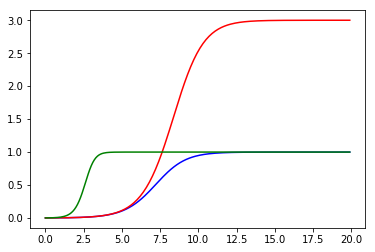

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def euler_int(fun,y0,dt,tspan):
    """
    integrates y (y'=fun(y,t))

    """
    t0   = tspan[0]
    tmax = tspan[1]
    t    = np.arange(t0,tmax,dt)
    y    = [y0]
    for i in range(len(t)-1):
        yi = y[-1] + fun(y[-1],t[i])*dt
        y.append(yi)
    return(t,np.array(y))

def logistic(y,t,r,k):
    return(r*y*(1-y/k))

logistic1 = lambda y,t : logistic(y,t,1,1) # This is another way to define a function
logistic2 = lambda y,t : logistic(y,t,1,3) # equivalent to def logistic1(y,t)
logistic3 = lambda y,t : logistic(y,t,3,1) # useful to attribute values to parameters before solving
t,y1 = euler_int(logistic1,0.001,0.1,[0,20])
t,y2 = euler_int(logistic2,0.001,0.1,[0,20])
t,y3 = euler_int(logistic3,0.001,0.1,[0,20])
plt.plot(t,y1,color='blue')
plt.plot(t,y2,color='red')
plt.plot(t,y3,color='green')
plt.show()

Say we have a function $u(x,t)$
$$
\frac{\partial u}{\partial t} = - \frac{\partial u}{\partial x}
$$
Our initial condition is $u(x,0) = e^{-x^2}$, or when discretized, a vector containing the values of $u$ for each $x$ of the grid. We derivate with respect to $x$ using a centered scheme, translating the discretization into:
$$
u^{n+1}_j = u^n_j - \Delta t \frac{u^n_{j+1}-u^n_{j-1}}{2 \Delta x}
$$
You will notice that in the case of a two variables function, another piece of information is needed : the boundary conditions.
In order to get rid of this boundary value problem, we consider that the space in which we solve is a tore (therefore there are no boundaries).

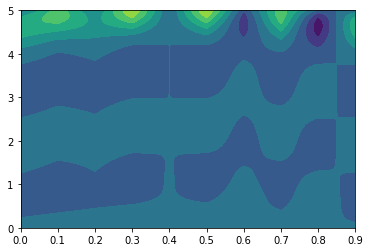

In [79]:
## A two-variables function

# Here we have a function u(x,t)
# We have an equation for each variable
def derivative(u,x,t,dx):
    """
    """
    dudx = np.zeros(len(x)) #an empty list the same size as x
    for i in range(1,len(x)-1):
        dudx[i] = (u[i+1]-u[i-1])/(2*dx)
    dudx[0] = (u[1]-u[-1])/(2*dx)
    dudx[-1] = dudx[0]
    dudt = np.zeros(len(x))
    for i in range(len(dudx)):
        dudt[i] = -dudx[i]
    return(dudt)

def solve(fun,fun0,x,tspan,dt,dx):
    time = np.arange(tspan[0],tspan[1],dt)
    sol  = np.zeros((len(x),len(time))) #create an empty matrix
    sol[:,0] = fun0 #first timestep is initial state
    for i in range(1,len(time)):
        sol[:,i] = sol[:,i-1] + dt*derivative(sol[:,i-1],x,time[i],dx)
    return(sol)

dx = 0.1
x  = np.arange(0,1,dx)
u0 = np.exp(-x**2)
dt = 0.001
tspan = [0,5]
sol = solve(derivative,u0,x,tspan,dt,dx)
X,T = np.meshgrid(x,np.arange(tspan[0],tspan[1],dt))
plt.contourf(X,T,np.transpose(sol))

## 4.4 Dynamical system
- Write a function solveequation(a,b,c,d,x0,y0,T,dt,mini,maxi) where the arguments a,b,c,d are the components of a matrix A, x0 and y0 are initial values, T is a simulation time, dt is a time step and mini, maxi are boundaries. Similarly to the previous exercise on Euler’s method, the function should simulate on a plot the trace of the two-variables vector X satisfying the differential system X’=AX.
- Test the function with :
    - solveequation(1.,-2.,-1.,0.,-1,-1.4,100,0.1,-5,5)
    - solveequation(0.5,-1.,1.,-0.6,2.,1.7,100,0.1,-5,5)
    - solveequation(0.5,-1.,1.,-0.4,2.,1.7,100,0.1,-5,5)
- Complete this function with a computing of the eigenvalues. Print the eigenvalues, and when they are positive plot the lines with the corresponding slopes on your figure. Plot also the isoclines corresponding to x’=0 or y’=0.